In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("smsspamcollection.csv", encoding="ISO-8859-1")
df.shape

(5572, 2)

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df=df.drop_duplicates()
df.shape

(5169, 2)

df.columns = ['label','message']
df.head()

In [9]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [10]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [11]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Fontconfig warning: ignoring UTF-8: not a valid region tag


Text(0.5, 0, 'Message Length')

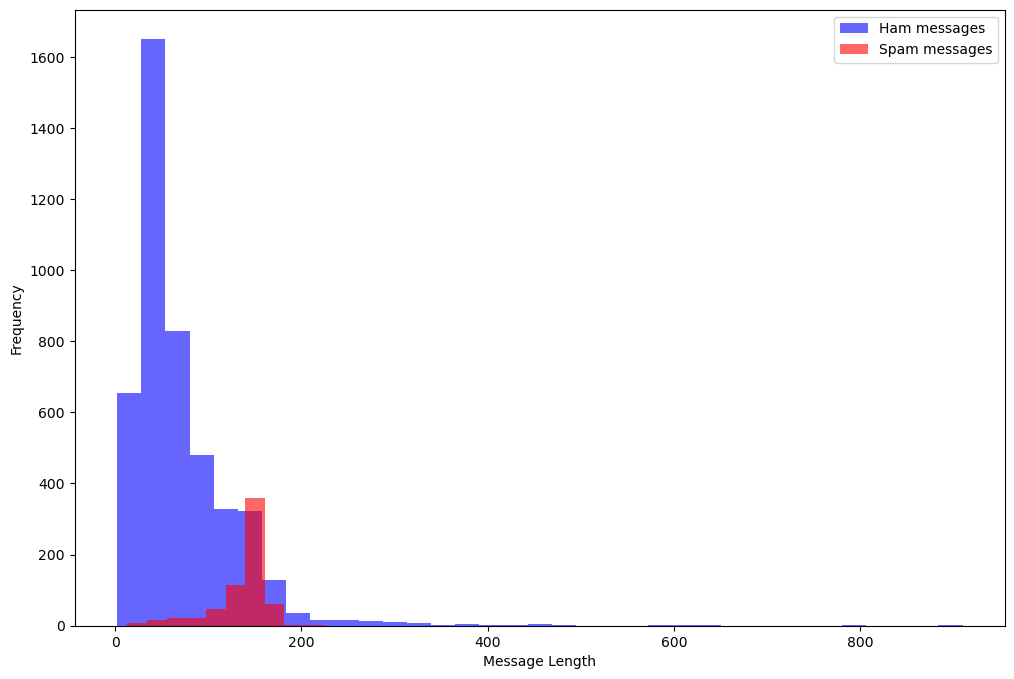

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")